# Anomaly Detection on DDoS Attack Detection using KMeans Algorithm

this notebook perform anomaly detection on a DDoS attack dataset using the KMeans clustering algorithm. The objective is to identify potential DDoS attacks (anomalies) from normal network traffic by identifying anomalies based on their abnormal activity using packet send per second and size of the packet send to the network.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:

#packet send per second and size of packet
data = np.array([
    [0.196705753183788, 0.266174967499455],
    [0.413286989521383, 0.355828352990633],
    [0.338435546719209, 0.435738258997923],
    [0.103801517189990, 0.164344805836115],
    [0.159052363075132, 0.325059012698889],
    [0.0669054926780630, 0.487418074001379],
    [0.335731444739015, 0.0379836806470678],
    [0.285495537731203, 0.293509583541386],
    [0.0848835330132443, 0.206943248886680],
    [0.0738278885758684, 0.154568213233134],
    [0.238039859133728, 0.131917020763398],
    [0.454051208253475, 0.379383132540102],
    [0.276087513357917, 0.497607990564876],
    [0.0164699463749383, 0.0932857220706846],
    [0.0269314632177781, 0.390572634267382],
    [0.402531614279451, 0.0978989905133660],
    [0.225687427351724, 0.496179486589963],
    [0.191323114779979, 0.401130784882144],
    [0.394821851844845, 0.212113354951653],
    [0.182143434749897, 0.364431934025687],
    [1.49835358252355, 1.40350138880436],
    [1.80899026719904, 1.93497908617805],
    [1.35650893348105, 1.47948454563248],
    [1.07324343448981, 1.23179161166312],
    [1.59099145527485, 1.39629024850978],
    [1.91018783072814, 1.70507747511279],
    [1.19376593616661, 1.55855903456055],
    [1.43236779153440, 1.75663070089437],
    [1.74915972906801, 1.99548105855526],
    [1.03918448664758, 1.96243140436663],
    [1.94632498980548, 1.53506710525616],
    [1.76367332366376, 1.96387012997171],
    [1.55882055050956, 1.11562587918126],
    [1.18384294446577, 1.05144829323021],
    [1.49794881501895, 1.30434894563657],
    [1.51784560023405, 1.58019183314271],
    [1.99424301064405, 1.53096445233828],
    [1.85485168309068, 1.90120809265314],
    [1.96240393971197, 1.54055042517024],
    [1.67894100897703, 1.43198061085668]
])



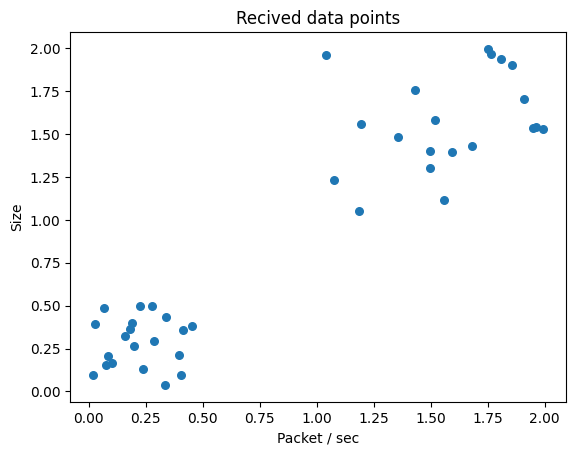

In [ ]:
# Plot the data
plt.scatter(data[:, 0], data[:, 1], s=30)
plt.title('Recived data points')
plt.xlabel('Packet / sec')
plt.ylabel('Size')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.79


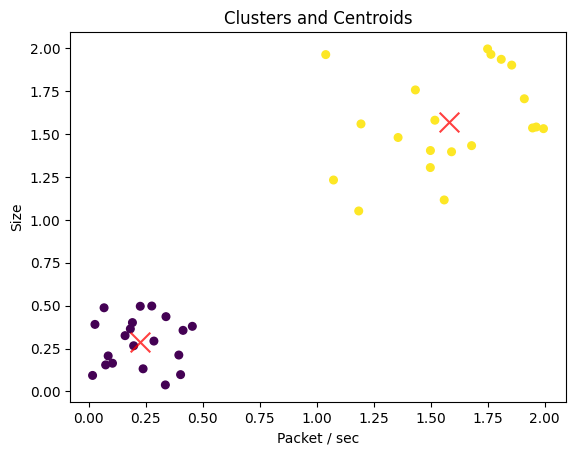

In [ ]:
# Apply K-Means clustering to group the data into two clusters
# roundemly intialize the centroids and asign each data to its nearest centroids
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

# Calculate silhouette score
# calculate how similar each data to it's cluster .
silhouette_avg = silhouette_score(data, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Plotting the clusters
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('Clusters and Centroids')
plt.xlabel('Packet / sec')
plt.ylabel('Size')
plt.show()

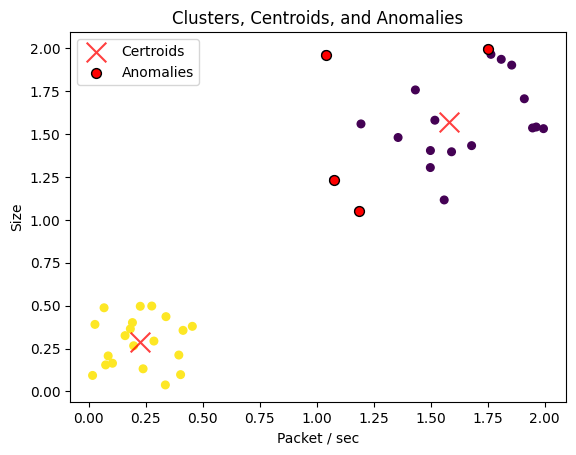

Number of anomalies detected: 4
4 Computers are detected as the cause of DDos by there abnormal traffic patterns


In [ ]:
# Calculate distance of each point to its cluster center
distances = np.linalg.norm(data - kmeans.cluster_centers_[y_kmeans], axis=1)

# Define a threshold for anomalies
threshold = np.percentile(distances, 90)
anomalies = data[distances > threshold]

# Plotting the anomalies
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x', label ='Certroids')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=50, marker='o', edgecolors='k', label='Anomalies')
plt.title('Clusters, Centroids, and Anomalies')
plt.xlabel('Packet / sec')
plt.ylabel('Size')
plt.legend()
plt.show()

print(f'Number of anomalies detected: {len(anomalies)}')
print(f'{len(anomalies)} Computers are detected as the cause of DDos by there abnormal traffic patterns')